Data Mining Superstore:Explorasi,Klasifikasi

Langkah 1: Upload dan Load Data

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_excel("Datasets Superstore.xlsx")
df.head()

Saving Datasets Superstore.xlsx to Datasets Superstore.xlsx


,Row ID,Order ID,Order Date,Year,Month,Day,Ship Mode,Customer ID,Customer Name,Segment,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016,November,8,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016,November,8,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016,Juni,12,Second Class,DV-13045,Darrin Van Huff,Corporate,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015,Oktober,11,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015,Oktober,11,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Langkah 2: Eksplorasi Data

In [ ]:
df.info()
print("\nMissing values:\n", df.isnull().sum())
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Year           9994 non-null   int64         
 4   Month          9994 non-null   object        
 5   Day            9994 non-null   int64         
 6   Ship Mode      9994 non-null   object        
 7   Customer ID    9994 non-null   object        
 8   Customer Name  9994 non-null   object        
 9   Segment        9994 non-null   object        
 10  Country        9994 non-null   object        
 11  City           9994 non-null   object        
 12  State          9994 non-null   object        
 13  Postal Code    9994 non-null   int64         
 14  Region         9994 non-null   object        
 15  Product ID     9994 n

Index(['Row ID', 'Order ID', 'Order Date', 'Year', 'Month', 'Day', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Langkah 3: Visualisasi

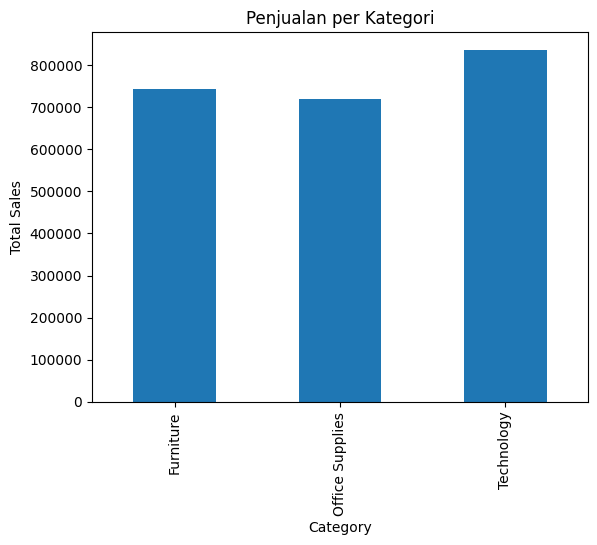

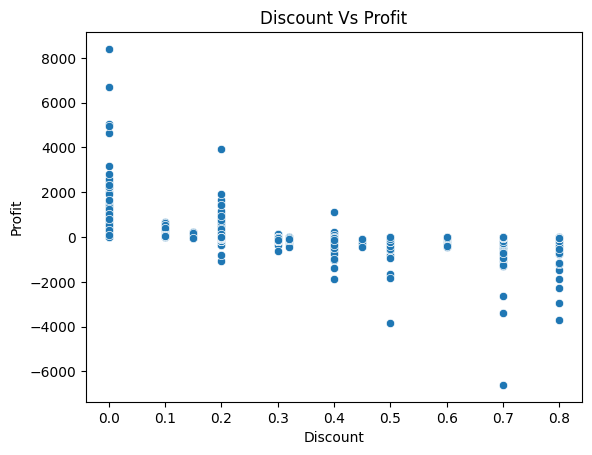

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df.groupby('Category')['Sales'].sum().plot(kind='bar', title='Penjualan per Kategori')
plt.ylabel('Total Sales')
plt.show()

sns.scatterplot(data=df, x='Discount',y='Profit')
plt.title('Discount Vs Profit')
plt.show()

Langkah 4: Klasifikasi Untung/Rugi

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

df['Label'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)
features = df[['Sales', 'Discount', 'Quantity']].fillna(0)
labels = df['Label']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       547
           1       0.96      0.96      0.96      2452

    accuracy                           0.93      2999
   macro avg       0.89      0.88      0.89      2999
weighted avg       0.93      0.93      0.93      2999

Confusion Matrix:
 [[ 442  105]
 [  96 2356]]


Langkah 5: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

df['Label'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)
features = df[['Sales', 'Discount', 'Quantity']].fillna(0)
labels = df['Label']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred))
print("Random Forest - Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       547
           1       0.96      0.97      0.96      2452

    accuracy                           0.94      2999
   macro avg       0.90      0.88      0.89      2999
weighted avg       0.94      0.94      0.94      2999

Random Forest - Confusion Matrix:
 [[ 439  108]
 [  83 2369]]


Langkah 6 : KNNeighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

df['Label'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)
features = df[['Sales', 'Discount', 'Quantity']].fillna(0)
labels = df['Label']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

print("KNN - Classification Report:\n", classification_report(y_test, y_pred))
print("KNN - Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


KNN - Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.36      0.46       547
           1       0.87      0.96      0.91      2452

    accuracy                           0.85      2999
   macro avg       0.76      0.66      0.69      2999
weighted avg       0.83      0.85      0.83      2999

KNN - Confusion Matrix:
 [[ 197  350]
 [ 109 2343]]


Langkah 7: Perbandingan

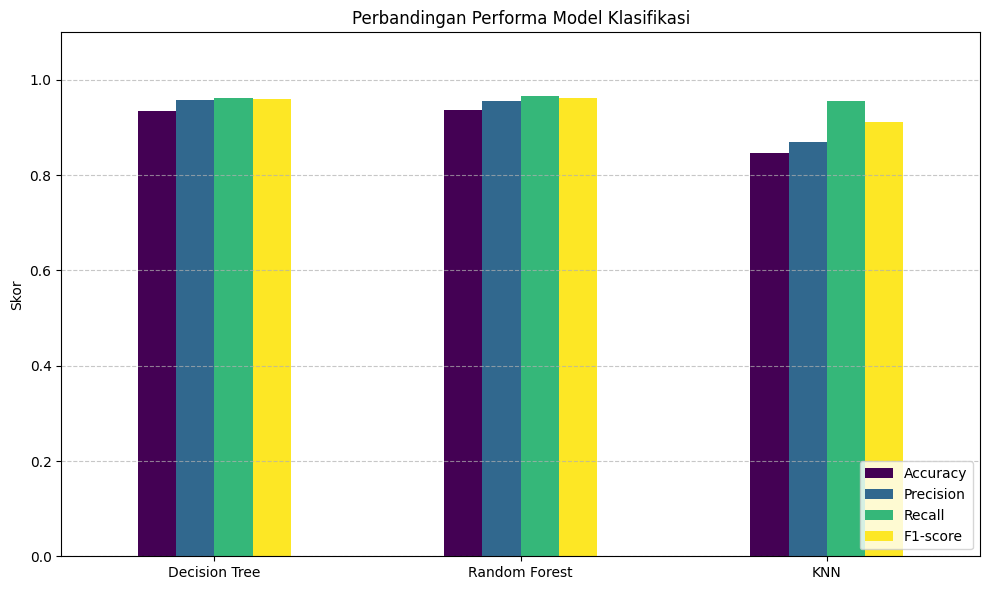

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

df['Label'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)
features = df[['Sales', 'Discount', 'Quantity']].fillna(0)
labels = df['Label']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        'Accuracy': report['accuracy'],
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-score': report['1']['f1-score']
    }

results_df = pd.DataFrame(results).T

results_df.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title('Perbandingan Performa Model Klasifikasi')
plt.ylabel('Skor')
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Langkah 8: Kesimpulan

- Random Forest menunjukkan performa terbaik secara keseluruhan di semua metrik (akurasi, precision, recall, f1-score). Model ini cocok jika Anda menginginkan hasil prediksi yang stabil dan kuat terhadap overfitting.

- Decision Tree cukup baik, namun bisa overfit jika tidak diatur maksimal depth atau pruning.

- KNN memiliki performa yang paling rendah di sini, kemungkinan karena sensitivitas terhadap skala data atau distribusi fitur. Bisa ditingkatkan dengan normalisasi fitur